In [1]:
from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-table-data.csv")
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,134957021,1728.819501,4450234,57.008159,646863,2918752,37.389647,75597,0.968409,10712,NaN
1,United States of America,Americas,30692226,9272.500000,387764,117.150000,0,554783,167.610000,4244,1.280000,0,Community transmission
2,Brazil,Americas,13373174,6291.500000,463092,217.860000,93317,348718,164.060000,20512,9.650000,3693,Community transmission
3,India,South-East Asia,13358805,968.030000,873296,63.280000,152879,169275,12.270000,4652,0.340000,839,Clusters of cases
4,France,Europe,4945238,7603.450000,265444,408.130000,43283,97956,150.610000,2087,3.210000,207,Community transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Pitcairn Islands,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
233,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
234,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
235,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases


In [4]:
df=df.drop(['WHO Region','Cases - cumulative total per 100000 population','Cases - newly reported in last 7 days per 100000 population','Deaths - cumulative total per 100000 population','Deaths - newly reported in last 7 days per 100000 population','Transmission Classification'],axis=1)
df

,Name,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours
0,Global,134957021,4450234,646863,2918752,75597,10712
1,United States of America,30692226,387764,0,554783,4244,0
2,Brazil,13373174,463092,93317,348718,20512,3693
3,India,13358805,873296,152879,169275,4652,839
4,France,4945238,265444,43283,97956,2087,207
...,...,...,...,...,...,...,...
232,Pitcairn Islands,0,0,0,0,0,0
233,Tokelau,0,0,0,0,0,0
234,Tonga,0,0,0,0,0,0
235,Turkmenistan,0,0,0,0,0,0


In [5]:
df=df.set_index('Name')
df

,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours
Name,,,,,,
Global,134957021,4450234,646863,2918752,75597,10712
United States of America,30692226,387764,0,554783,4244,0
Brazil,13373174,463092,93317,348718,20512,3693
India,13358805,873296,152879,169275,4652,839
France,4945238,265444,43283,97956,2087,207
...,...,...,...,...,...,...
Pitcairn Islands,0,0,0,0,0,0
Tokelau,0,0,0,0,0,0
Tonga,0,0,0,0,0,0


In [6]:
df['Recovered']=df['Cases - cumulative total']-df['Deaths - cumulative total']

In [7]:
#df.loc[[inp]]

In [8]:
df

,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Recovered
Name,,,,,,,
Global,134957021,4450234,646863,2918752,75597,10712,132038269
United States of America,30692226,387764,0,554783,4244,0,30137443
Brazil,13373174,463092,93317,348718,20512,3693,13024456
India,13358805,873296,152879,169275,4652,839,13189530
France,4945238,265444,43283,97956,2087,207,4847282
...,...,...,...,...,...,...,...
Pitcairn Islands,0,0,0,0,0,0,0
Tokelau,0,0,0,0,0,0,0
Tonga,0,0,0,0,0,0,0


In [9]:
inp=input("Enter Country : ")

Enter Country : India


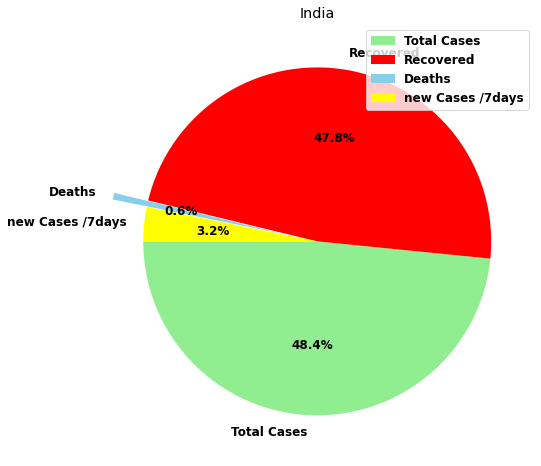

In [12]:
import matplotlib.pyplot as plt
total=df.at[inp,'Cases - cumulative total']
recovered=df.at[inp,'Recovered']
Deaths=df.at[inp,'Deaths - cumulative total']
new7=df.at[inp,'Cases - newly reported in last 7 days']
#d7=df.at[inp,'Deaths - newly reported in last 7 days']
f=plt.figure(figsize=(8,8)) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams.update({'text.color' : "black",'axes.labelcolor' : "black"})
plt.pie([total,recovered,Deaths,new7],labels=['Total Cases','Recovered','Deaths','new Cases /7days'],colors = ['lightgreen','red','skyblue','yellow'],explode=(0,0,0.2,0.0),startangle = 180,autopct = '%1.1f%%')
#DISPLAYING THE PLOT
plt.title(inp)
plt.legend()
plt.show()